In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
X_train=np.load('dataset/X_train.npy')
y_train=np.load('dataset/y_train.npy')
X_test=np.load('dataset/X_test.npy')
y_test=np.load('dataset/y_test.npy')

In [3]:
X_train, X_test =X_train / 255.0 ,X_test / 255.0

In [4]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1712, 64, 64), (50, 64, 64), (1712, 10), (50, 10))

In [5]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

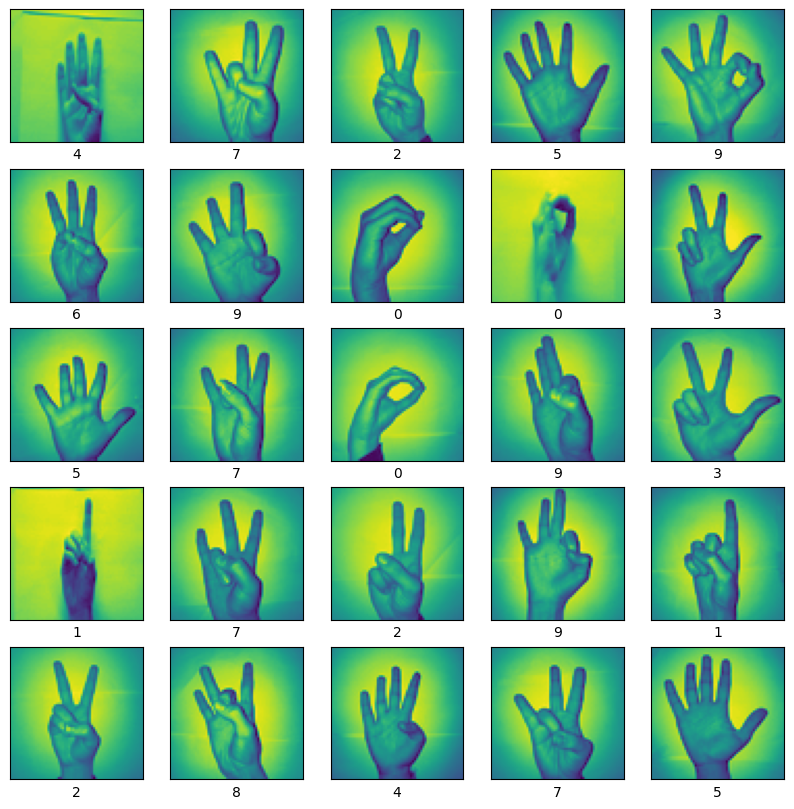

In [6]:

plt.figure(figsize=(10,10))

for i in range(25) : #loop over 25 images
    plt.subplot(5,5,i+1) #create a subplot of size 5,5
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) #dont show the grid
    plt.imshow(X_train[i]) #todo: plot the image of index i of the training set
    plt.xlabel(np.argmax(y_train[i])) #todo: add the class name of the image of index i
plt.show()

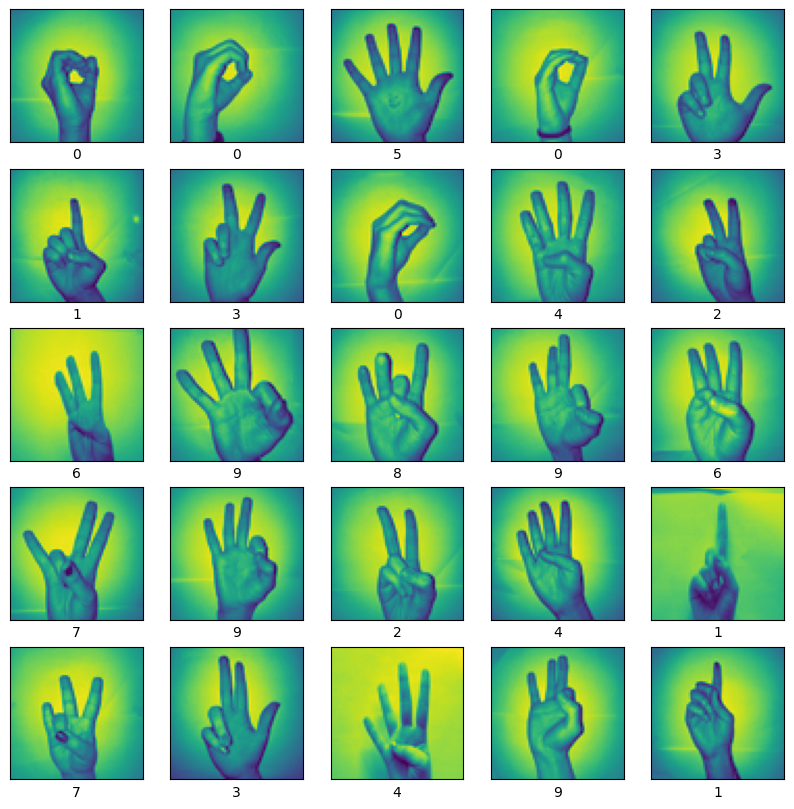

In [7]:

plt.figure(figsize=(10,10))

for i in range(25) : 
    plt.subplot(5,5,i+1) 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(X_test[i]) 
    plt.xlabel(np.argmax(y_test[i])) 
plt.show()

In [8]:
X_train=X_train.reshape(-1, 64, 64, 1)  # Add channel for grayscale
X_test=X_test.reshape(-1, 64, 64, 1) 

X_train.shape , X_test.shape

((1712, 64, 64, 1), (50, 64, 64, 1))

In [9]:

model = models.Sequential() 
model.add(layers.Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='relu',input_shape=(64, 64, 1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu')) 
model.add(layers.Dense(10,activation='softmax')) 

c:\Users\manar\Desktop\AI-projects\SignLanguage\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       524,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 525,066 (2.00 MB)

 Trainable params: 525,066 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras.optimizers import Adam

optimizer=Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999)
# learning rate kteer s8ir btt3m bi bot2 bs btt3lm kl shi
# 2za 3alyi learning rate btt3lm asr3 bs momkn tensa feature mohmin ma tmro2 3lyhon
# afdl learning rate to test

In [12]:
# loss hik leno 3ndi b5er layer softmax 2za ma 3ndi bt3ml lfo2 wb7ot fromlogits=true

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy' ,
              # loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),if ma 3ndi softmax 25er shi
              metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=100,
                    validation_data=(X_test, y_test))

# bsyv bl history kirmil 22dr worsm graph b3den

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.0924 - loss: 2.3119 - val_accuracy: 0.1000 - val_loss: 2.2926
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1489 - loss: 2.2850 - val_accuracy: 0.1800 - val_loss: 2.2491
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.2612 - loss: 2.2180 - val_accuracy: 0.1200 - val_loss: 2.2014
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3139 - loss: 2.1416 - val_accuracy: 0.1600 - val_loss: 2.1364
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.3883 - loss: 2.0350 - val_accuracy: 0.4600 - val_loss: 2.0428
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4806 - loss: 1.9028 - val_accuracy: 0.3600 - val_loss: 1.9497
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4807 - loss: 1.7728 - val_accuracy: 0.4200 - val_loss: 1.8403
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5583 - loss: 1.6452 - val_accuracy: 0.

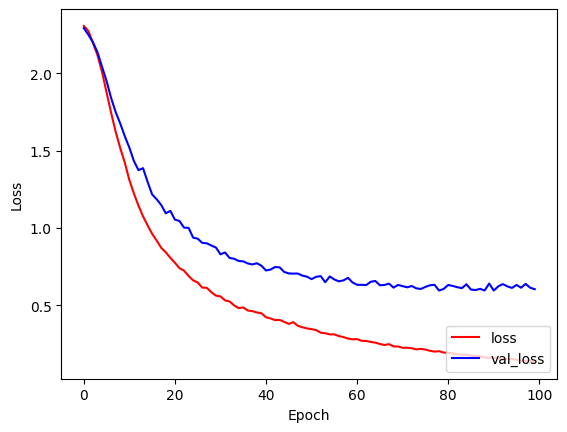

In [13]:
#Plot loss
plt.plot(history.history['loss'],color='r', label='loss')
plt.plot(history.history['val_loss'] ,color='b', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.show()

In [ ]:
#add layers to decrease the differance between loss and val_loss

In [34]:
#Use Keras Sequential API
# models wl layers m3rfiton fo2
from tensorflow.keras.optimizers import Adam

model = models.Sequential() # init keras sequential

model.add(layers.Conv2D(filters=16,kernel_size=(5,5),padding='same',activation='relu',input_shape=(64, 64, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu')) # b5od nfs 3dd neuron lken b25er layer
model.add(layers.Dense(64,activation='relu')) 
model.add(layers.Dense(32,activation='relu')) 
model.add(layers.Dense(10,activation='softmax')) # Pay attention to the number of neurons here, its the output layer

# loss hik leno 3ndi b5er layer softmax 2za ma 3ndi bt3ml lfo2 wb7ot fromlogits=true
optimizer=Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy' ,
              # loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),if ma 3ndi softmax 25er shi
              metrics=['accuracy'])

history = model.fit(X_train,y_train, epochs=100,
                    validation_data=(X_test, y_test))

# bsyv bl history kirmil 22dr worsm graph b3den

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 160ms/step - accuracy: 0.1140 - loss: 2.5420 - val_accuracy: 0.1000 - val_loss: 2.3171
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.1448 - loss: 2.2622 - val_accuracy: 0.1000 - val_loss: 2.3490
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.2290 - loss: 2.1179 - val_accuracy: 0.1000 - val_loss: 2.3757
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - accuracy: 0.3148 - loss: 1.9146 - val_accuracy: 0.1000 - val_loss: 2.3668
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.4333 - loss: 1.6903 - val_accuracy: 0.1200 - val_loss: 2.3346
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.4847 - loss: 1.4439 - val_accuracy: 0.1800 - val_loss: 2.2637
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - accuracy: 0.5964 - loss: 1.1751 - val_accuracy: 0.2000 - val_loss: 2.1768
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 8s 155ms/step - accuracy: 0.6485 - loss: 1.0356 - val_

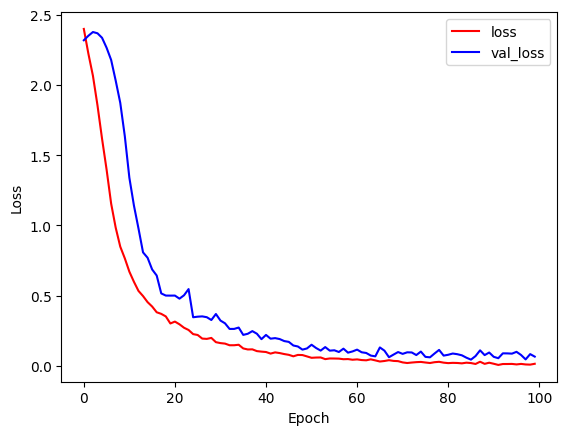

In [35]:
# Plot loss
plt.plot(history.history['loss'],color='r', label='loss')
plt.plot(history.history['val_loss'] ,color='b', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

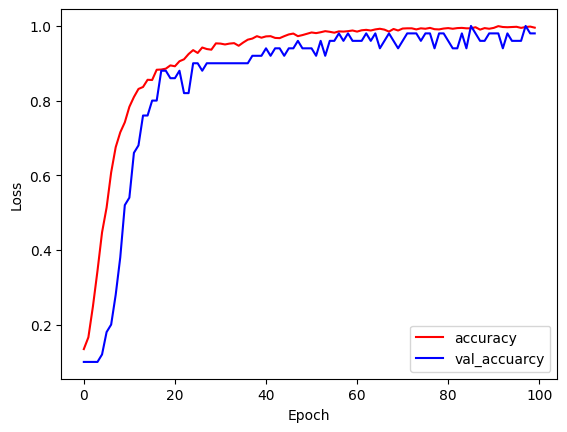

In [36]:
# Plot accuracy
plt.plot(history.history['accuracy'],color='r', label='accuracy')
plt.plot(history.history['val_accuracy'] ,color='b', label = 'val_accuarcy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

plt.show()